<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

# CNN Pets Project — Outputs Viewer
This notebook is a **read-only showcase** of the artifacts generated by the training/evaluation scripts.

**Repo layout (expected):**
- `../outputs/resnet18/` — baseline model artifacts
- `../outputs/efficientnet_b0/` — improved model artifacts
- `../outputs/compare/` — cross-model disagreement analysis (including Grad-CAM comparison)

If anything fails to load, first check that the `outputs/` folder exists at:
`C:\Users\Kiera\cnn-pet-breed-gradcam\outputs` (Windows)


</div>

In [13]:

# --- Setup: paths, utilities ---
from pathlib import Path
import json
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# This notebook lives in: .../cnn-pet-breed-gradcam/notebooks/
# Outputs live in:       .../cnn-pet-breed-gradcam/outputs/
ROOT = Path.cwd().resolve()              # current working directory when notebook runs
OUT = (ROOT.parent / "outputs").resolve()

paths = {
    "resnet18": OUT / "resnet18",
    "efficientnet_b0": OUT / "efficientnet_b0",
    "compare": OUT / "compare",
}

def read_json(p: Path):
    return json.loads(p.read_text(encoding="utf-8"))


def show_image(path: Path, title: str = "", max_width_px: int = 1200):
    img = Image.open(path)

    # Downscale in-place for display only
    if img.width > max_width_px:
        ratio = max_width_px / img.width
        new_size = (max_width_px, int(img.height * ratio))
        img = img.resize(new_size)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

print("Notebook working directory:", ROOT)
print("Outputs directory:", OUT)
print("\nExists?")
for k, p in paths.items():
    print(f" - {k}: {p.exists()}  ({p})")


Notebook working directory: C:\Users\Kiera\cnn-pet-breed-gradcam\notebooks
Outputs directory: C:\Users\Kiera\cnn-pet-breed-gradcam\outputs

Exists?
 - resnet18: True  (C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\resnet18)
 - efficientnet_b0: True  (C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\efficientnet_b0)
 - compare: True  (C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\compare)


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 1) Quick inventory
This section confirms what files are present and their sizes. Large artifacts (e.g., `disagreements_gradcam.png`) are expected to be big.


</div>

In [14]:

# --- Inventory ---
def human_bytes(n: int) -> str:
    units = ["B","KB","MB","GB"]
    x = float(n)
    for u in units:
        if x < 1024.0 or u == units[-1]:
            return f"{x:.2f} {u}"
        x /= 1024.0

rows = []
for section, folder in paths.items():
    if not folder.exists():
        continue
    for f in sorted(folder.rglob("*")):
        if f.is_file():
            rows.append({
                "section": section,
                "file": f.name,
                "size": human_bytes(f.stat().st_size),
                "path": str(f)
            })

inv = pd.DataFrame(rows).sort_values(["section","file"]).reset_index(drop=True)
inv


section                             file        size  \
0           compare          disagree_01_idx_162.png   983.19 KB   
1           compare         disagree_02_idx_2074.png   893.85 KB   
2           compare         disagree_03_idx_2628.png   953.40 KB   
3           compare          disagree_04_idx_479.png  1016.73 KB   
4           compare          disagree_05_idx_264.png     1.07 MB   
5           compare         disagree_06_idx_2031.png   801.79 KB   
6           compare         disagree_07_idx_1199.png     1.10 MB   
7           compare         disagree_08_idx_1922.png     1.29 MB   
8           compare          disagree_09_idx_821.png   599.47 KB   
9           compare         disagree_10_idx_2555.png   758.60 KB   
10          compare         disagree_11_idx_1034.png     1.15 MB   
11          compare         disagree_12_idx_3204.png   694.52 KB   
12          compare                disagreements.csv     1.54 KB   
13          compare  disagreements_contact_sheet.png     3.36 MB   
14  efficientnet_b0                    best_model.pt    15.75 MB   
15  efficientnet_b0                     classes.json    749.00 B   
16  efficientnet_b0             confusion_matrix.png    57.05 KB   
17  efficientnet_b0             correct_examples.png     3.56 MB   
18  efficientnet_b0                  predictions.csv   194.00 KB   
19  efficientnet_b0                     summary.json     45.00 B   
20  efficientnet_b0                test_metrics.json     5.86 KB   
21  efficientnet_b0               train_metrics.json     1.76 KB   
22  efficientnet_b0               wrong_examples.png     4.65 MB   
23         resnet18                    best_model.pt    42.78 MB   
24         resnet18                     classes.json    749.00 B   
25         resnet18             confusion_matrix.png    55.51 KB   
26         resnet18             correct_examples.png     3.52 MB   
27         resnet18                  predictions.csv   194.22 KB   
28         resnet18                     summary.json     45.00 B   
29         resnet18                test_metrics.json     5.85 KB   
30         resnet18               train_metrics.json     1.77 KB   
31         resnet18               wrong_examples.png     3.90 MB   

                                                 path  
0   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
1   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
2   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
3   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
4   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
5   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
6   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
7   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
8   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
9   C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
10  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
11  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
12  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
13  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\c...  
14  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
15  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
16  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
17  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
18  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
19  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
20  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
21  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
22  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...  
23  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
24  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
25  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
26  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
27  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
28  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
29  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
30  C:\Users\Kiera\cnn-pet-bree

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 2) Load key metrics
We’ll read the saved JSON metrics files and create a compact comparison table.

**Notes:**
- `summary.json` contains best validation macro-F1.
- `test_metrics.json` contains test macro-F1 and a classification report.


</div>

In [15]:

# --- Load metrics and build comparison table ---
def load_metrics(model_folder: Path):
    summary = read_json(model_folder / "summary.json") if (model_folder / "summary.json").exists() else {}
    test = read_json(model_folder / "test_metrics.json") if (model_folder / "test_metrics.json").exists() else {}
    return summary, test

models = [
    ("ResNet18 (baseline)", paths["resnet18"]),
    ("EfficientNet-B0", paths["efficientnet_b0"]),
]

table = []
for name, folder in models:
    summary, test = load_metrics(folder)
    table.append({
        "model": name,
        "best_val_macro_f1": summary.get("best_val_macro_f1", None),
        "test_macro_f1": test.get("test_macro_f1", None),
        "folder": str(folder)
    })

metrics_df = pd.DataFrame(table)
metrics_df


model  best_val_macro_f1  test_macro_f1  \
0  ResNet18 (baseline)           0.905197       0.887722   
1      EfficientNet-B0           0.925379       0.899885   

                                              folder  
0  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\r...  
1  C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\e...

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 3) Confusion matrices
These are generated by `src/evaluate.py` for each model.


</div>

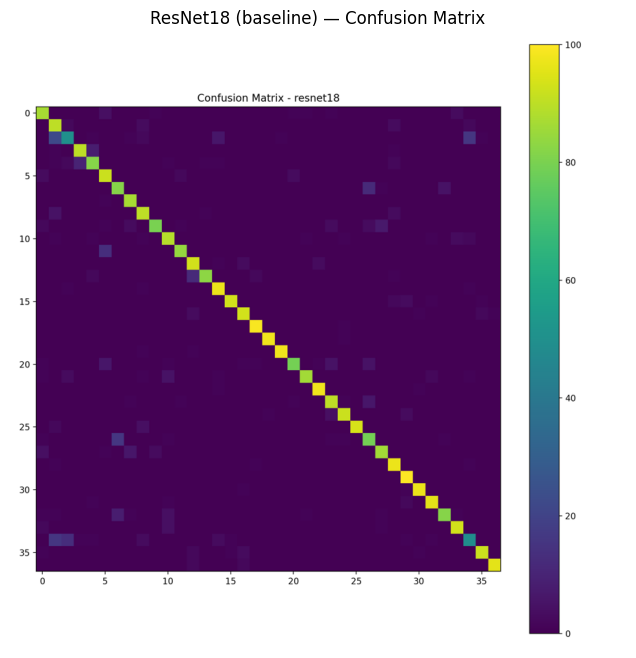

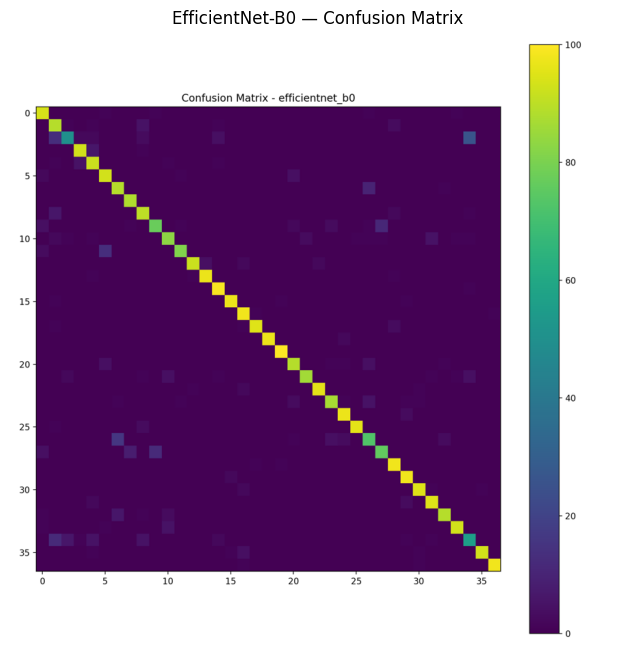

In [16]:

# --- Confusion matrices ---
for name, folder in models:
    cm_path = folder / "confusion_matrix.png"
    if cm_path.exists():
        show_image(cm_path, title=f"{name} — Confusion Matrix", max_width_px=900)
    else:
        print(f"Missing: {cm_path}")


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 4) Example predictions (Correct vs Wrong)
These grids are generated by `src/evaluate.py` and show real model predictions.

- **Correct examples:** Ground-truth label matches predicted label.
- **Wrong examples:** Misclassifications with predicted label + confidence shown.


</div>

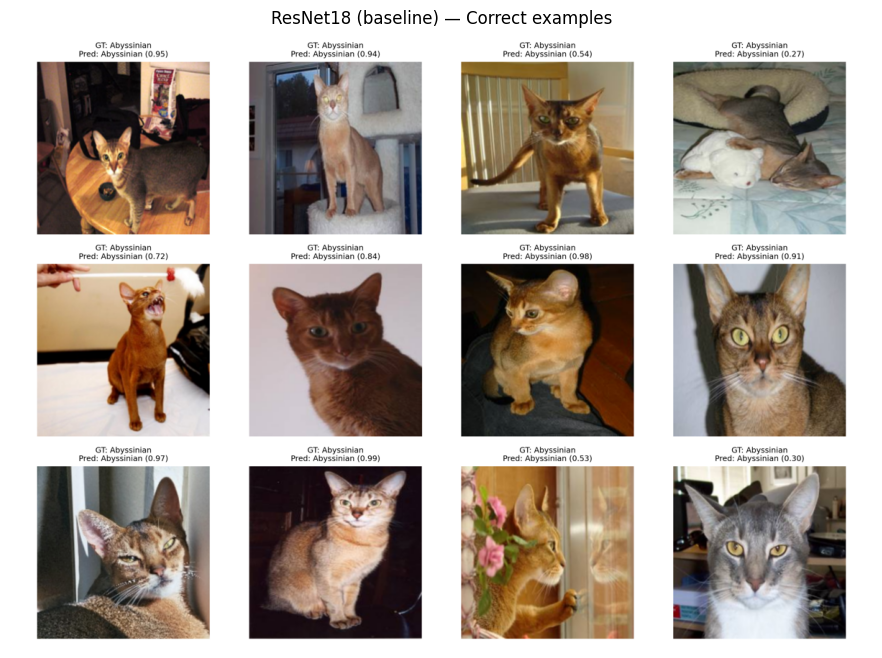

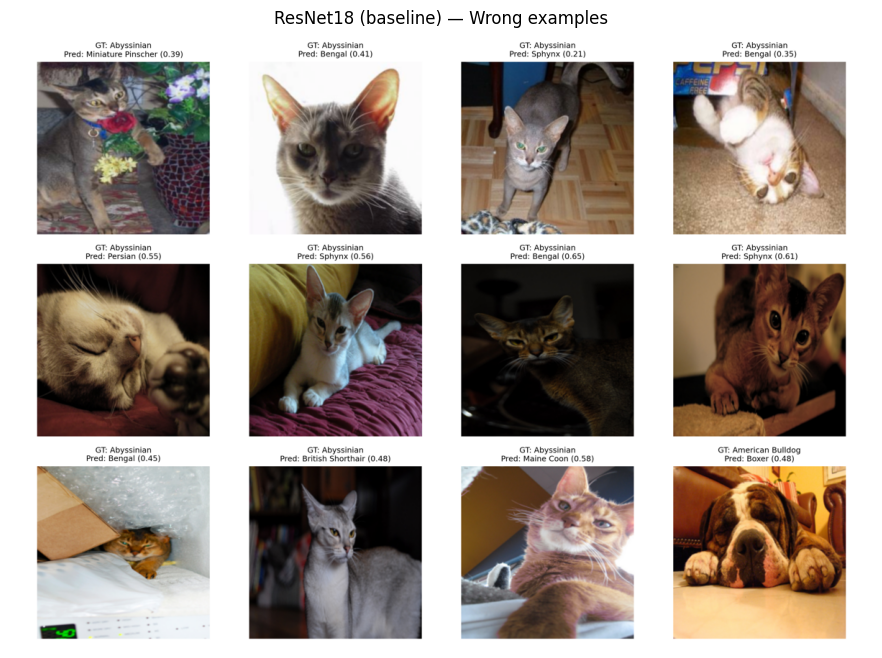

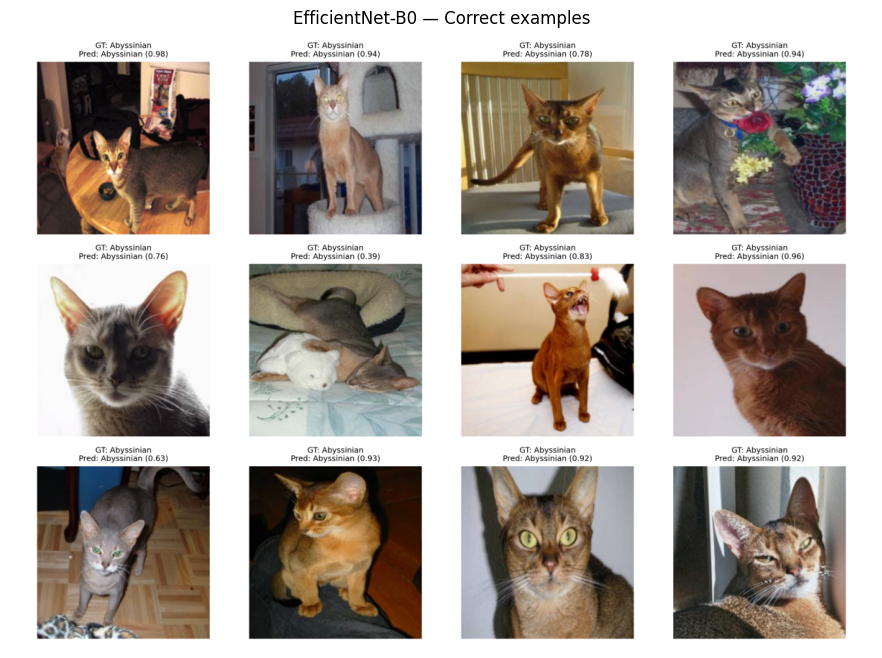

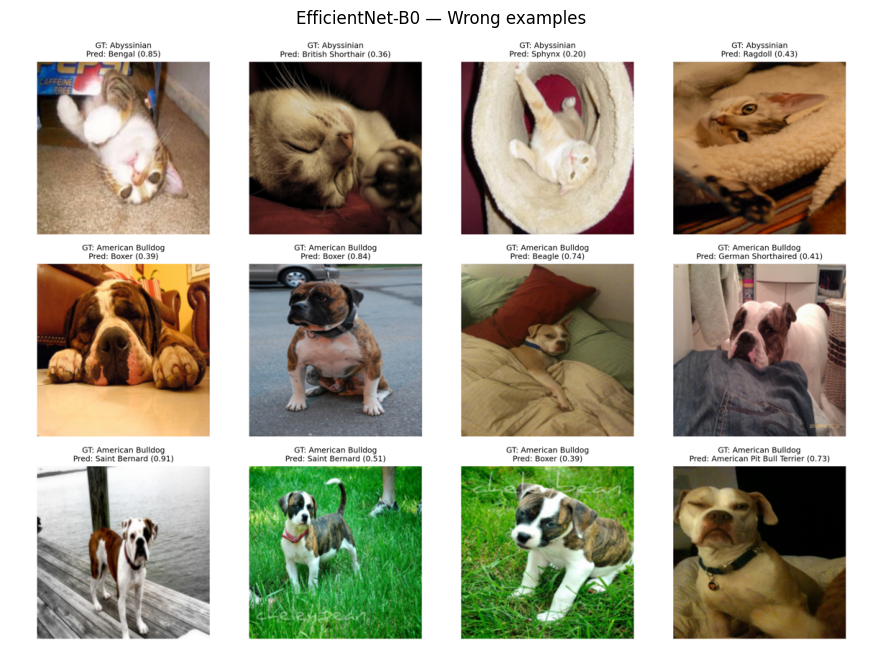

In [17]:

# --- Correct/Wrong example grids ---
for name, folder in models:
    c_path = folder / "correct_examples.png"
    w_path = folder / "wrong_examples.png"
    if c_path.exists():
        show_image(c_path, title=f"{name} — Correct examples", max_width_px=1200)
    else:
        print(f"Missing: {c_path}")
    if w_path.exists():
        show_image(w_path, title=f"{name} — Wrong examples", max_width_px=1200)
    else:
        print(f"Missing: {w_path}")


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 5) Deeper dive: what the model confuses most
Using `predictions.csv`, we can identify the most frequent confusion pairs.

This is useful for **error analysis**: it usually highlights visually similar breeds.


</div>

In [18]:

# --- Most confused pairs (top 10) ---
def most_confused_pairs(pred_csv: Path, top_k: int = 10):
    df = pd.read_csv(pred_csv)
    wrong = df[df["y_true"] != df["y_pred"]].copy()
    if wrong.empty:
        return pd.DataFrame(columns=["pair","count"])
    wrong["pair"] = wrong["true_label"] + " → " + wrong["pred_label"]
    out = wrong["pair"].value_counts().head(top_k).reset_index()
    out.columns = ["pair", "count"]
    return out

for name, folder in models:
    p = folder / "predictions.csv"
    if p.exists():
        display(pd.DataFrame({"model":[name]}))
        display(most_confused_pairs(p, top_k=10))
    else:
        print(f"Missing: {p}")


model
0  ResNet18 (baseline)

pair  count
0       American Pit Bull Terrier → American Bulldog     22
1  American Pit Bull Terrier → Staffordshire Bull...     16
2                                   Ragdoll → Birman     16
3      Staffordshire Bull Terrier → American Bulldog     16
4                              Egyptian Mau → Bengal     13
5  Staffordshire Bull Terrier → American Pit Bull...     13
6                                   Birman → Ragdoll     12
7            English Setter → English Cocker Spaniel     12
8                              Beagle → Basset Hound     10
9                              Basset Hound → Beagle      8

model
0  EfficientNet-B0

pair  count
0  American Pit Bull Terrier → Staffordshire Bull...     26
1                                   Ragdoll → Birman     16
2       American Pit Bull Terrier → American Bulldog     13
3                              Egyptian Mau → Bengal     13
4                   Russian Blue → British Shorthair     12
5      Staffordshire Bull Terrier → American Bulldog     12
6                   British Shorthair → Russian Blue     11
7                                   Birman → Ragdoll     10
8                              Russian Blue → Bombay      8
9                              Basset Hound → Beagle      6

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 6) Model disagreements + Grad-CAM comparison

This section shows cases where **ResNet18 and EfficientNet disagree** and visualises **Grad-CAM overlays** for each model.

- `outputs/compare/disagreements.csv` — list of test indices where the model predictions differ
- `outputs/compare/disagreements/` — **one PNG per disagreement** (Original + ResNet18 Grad-CAM + EfficientNet Grad-CAM + GT/preds)
- `outputs/compare/disagreements_contact_sheet.png` — overview sheet

</div>

In [19]:
# --- Disagreements table ---
dis_csv = paths["compare"] / "disagreements.csv"
if dis_csv.exists():
    dis = pd.read_csv(dis_csv)
    print("Number of disagreements:", len(dis))
    display(dis.head(20))
else:
    print(f"Missing: {dis_csv}")

Number of disagreements: 341


index
0       3
1       4
2       8
3      14
4      20
5      27
6      46
7      47
8      49
9      72
10     86
11     92
12    157
13    158
14    162
15    164
16    171
17    188
18    192
19    195

In [21]:
# --- List individual disagreement panel images ---
panels_dir = paths["compare"] / "disagreements"
if panels_dir.exists():
    panel_paths = sorted(panels_dir.glob("*.png"))
    print(f"Found {len(panel_paths)} disagreement panels in {panels_dir}")
    # show first 10 filenames
    for p in panel_paths[:10]:
        print(" -", p.name)
else:
    panel_paths = []
    print(f"Missing: {panels_dir}")

Found 12 disagreement panels in C:\Users\Kiera\cnn-pet-breed-gradcam\outputs\compare\disagreements
 - disagree_01_idx_162.png
 - disagree_02_idx_2074.png
 - disagree_03_idx_2628.png
 - disagree_04_idx_479.png
 - disagree_05_idx_264.png
 - disagree_06_idx_2031.png
 - disagree_07_idx_1199.png
 - disagree_08_idx_1922.png
 - disagree_09_idx_821.png
 - disagree_10_idx_2555.png


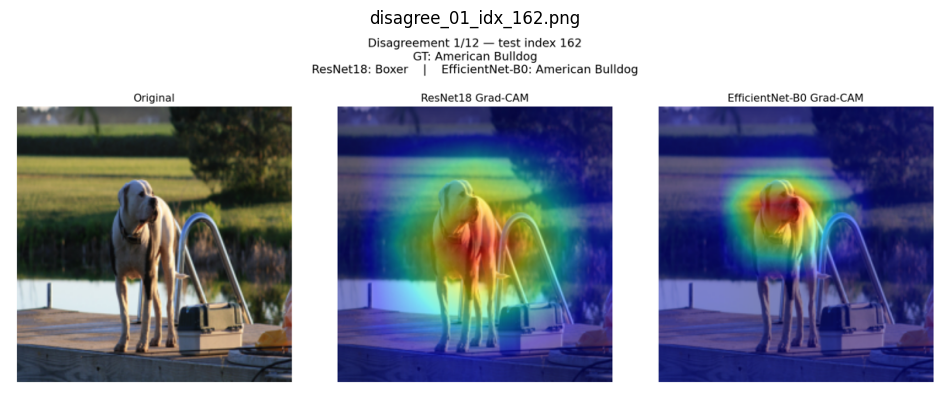

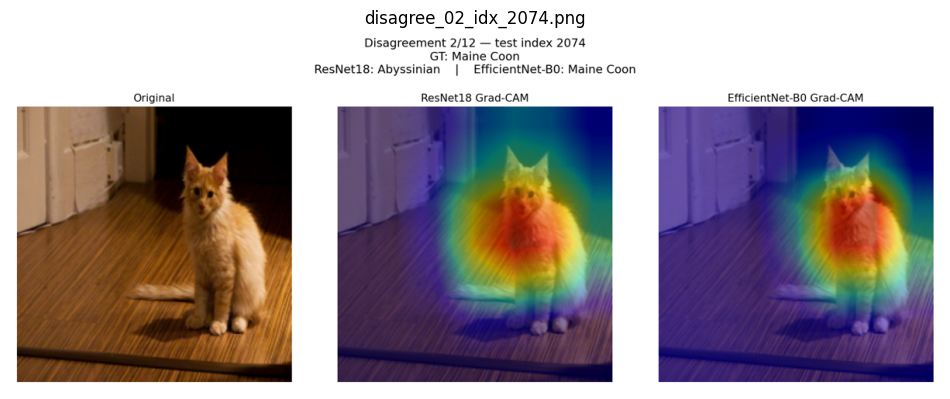

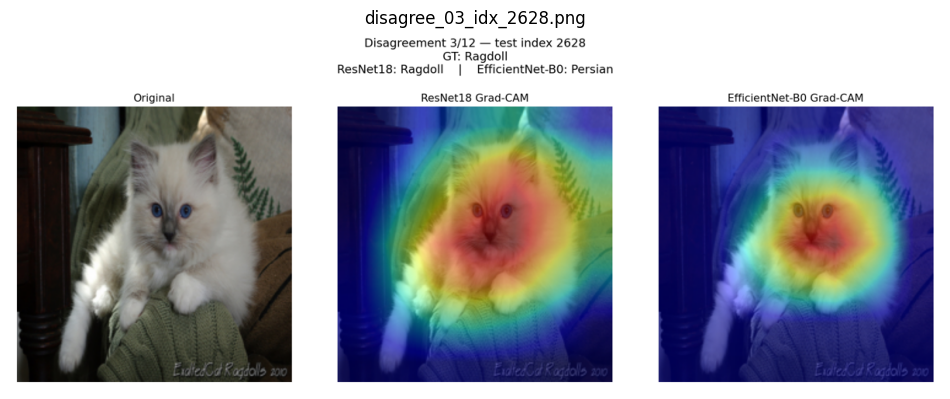

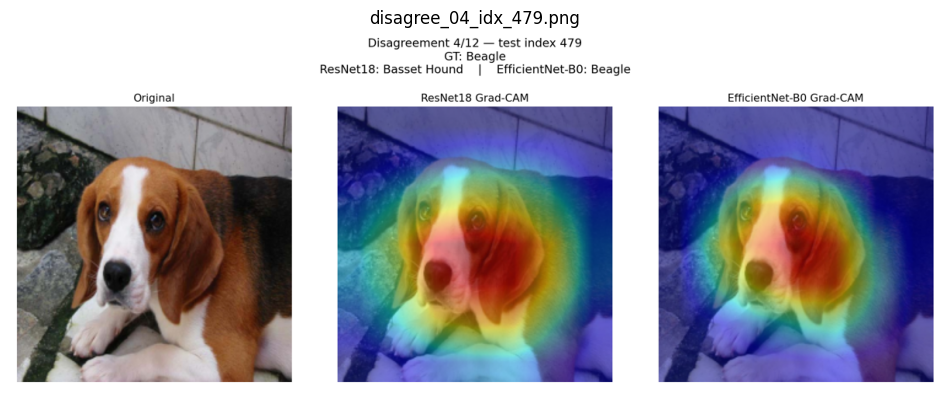

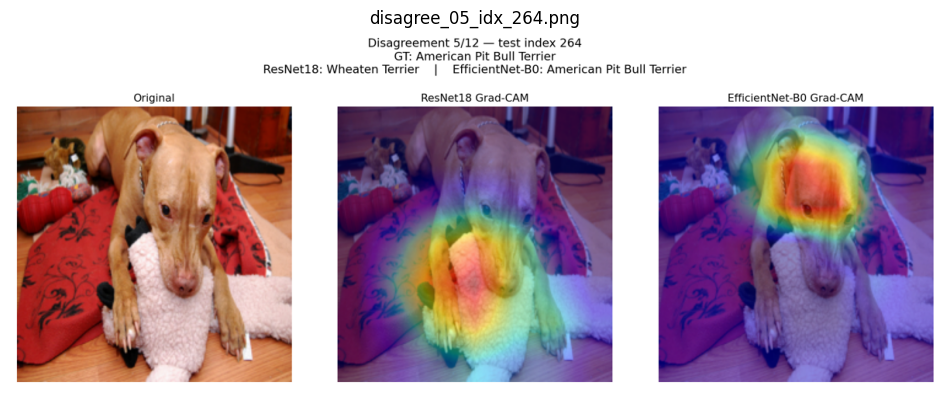

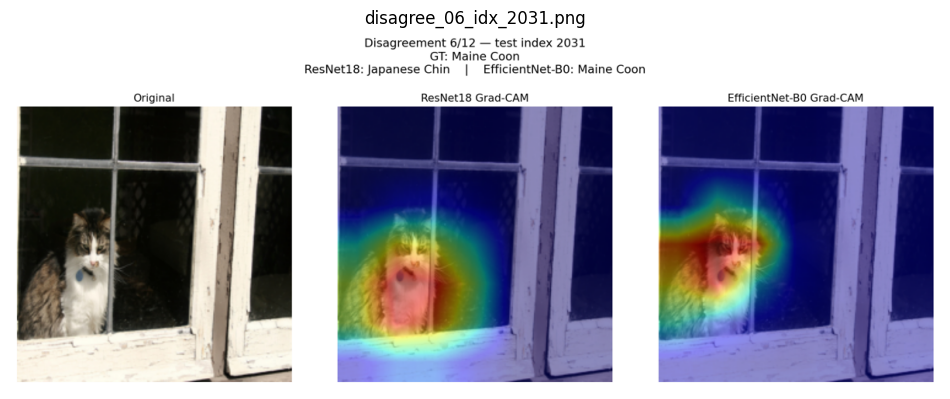

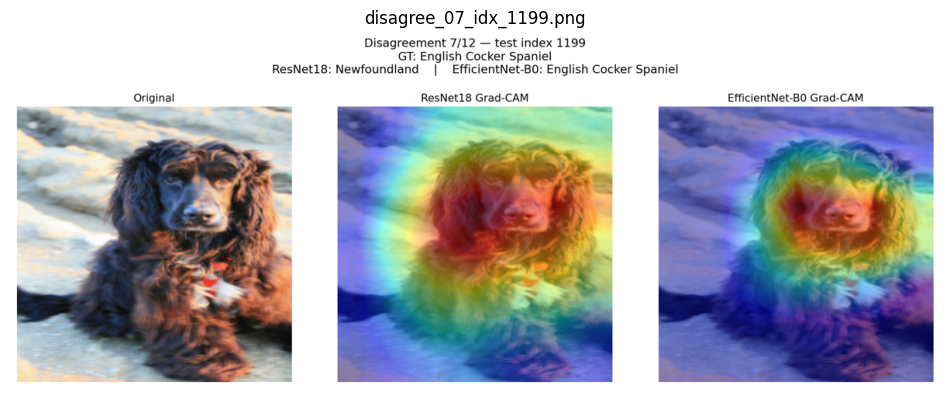

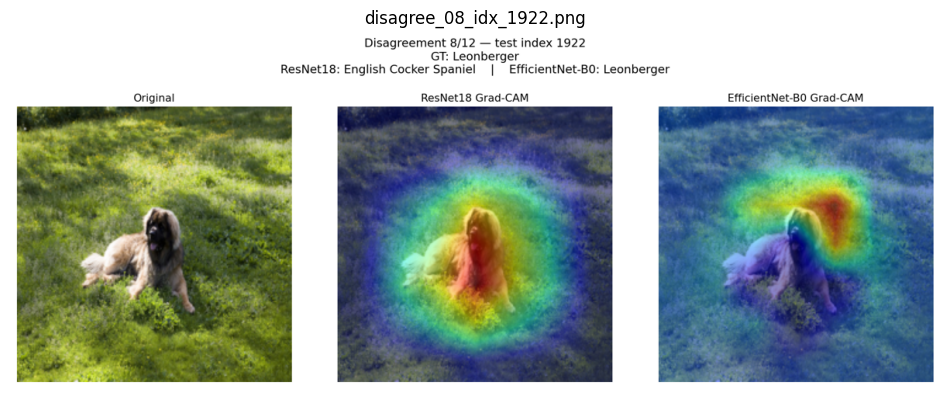

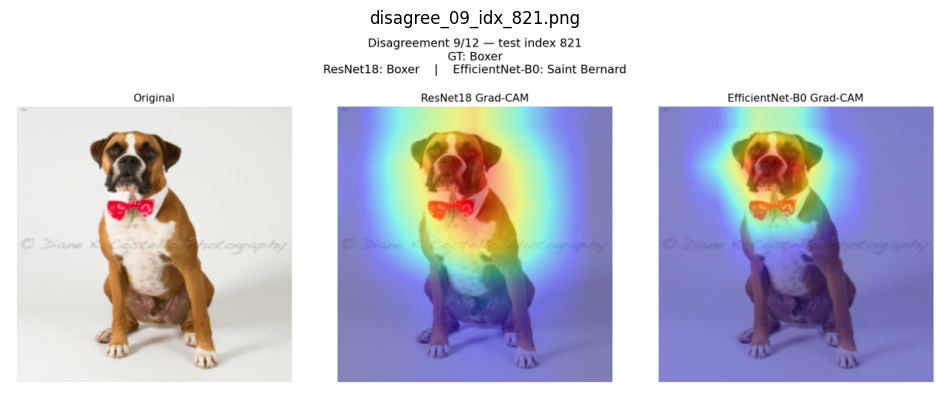

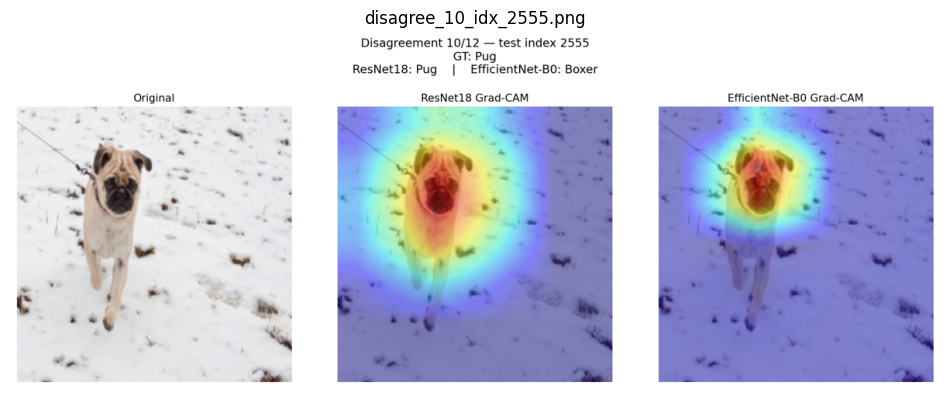

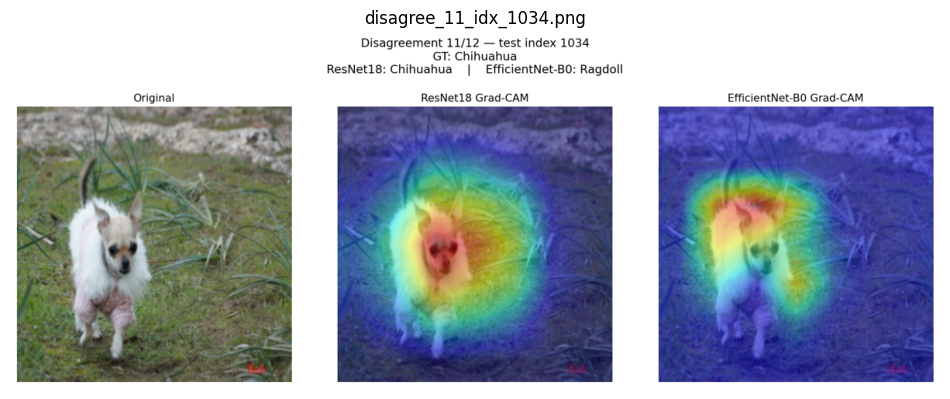

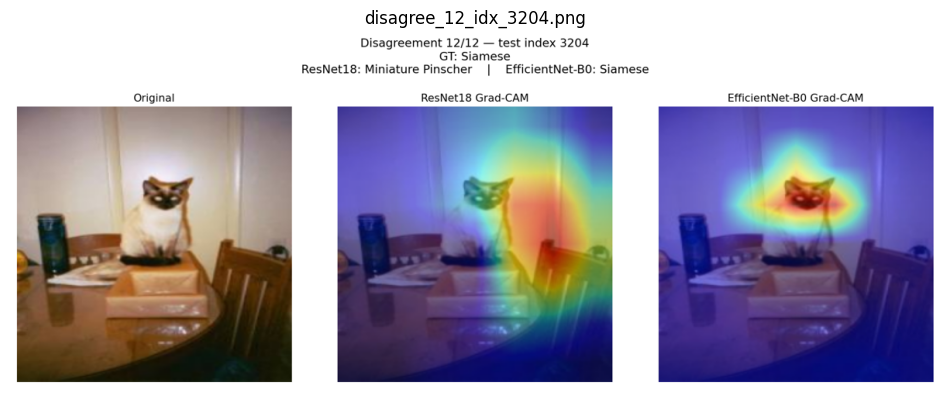

In [22]:
# --- Display first 12 disagreement panels ---
N = 12
for p in panel_paths[:N]:
    show_image(p, title=p.name, max_width_px=1200)

In [23]:
# --- Display a specific disagreement by test index (optional) ---
target_idx = None  # e.g. set to 1234, or keep None to skip

if target_idx is not None:
    matches = [p for p in panel_paths if f"_idx_{target_idx}" in p.name]
    if matches:
        show_image(matches[0], title=f"Disagreement panel for idx={target_idx}", max_width_px=1200)
    else:
        print(f"No panel found containing _idx_{target_idx} in filename.")

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 1.35;">

## 7) (Optional) Pull out per-class metrics
`test_metrics.json` contains a full classification report (precision/recall/F1 per class). Here we display the worst-performing classes by F1 for each model.


</div>

In [24]:

# --- Worst classes by F1 (per model) ---
def worst_classes_by_f1(test_metrics_path: Path, top_k: int = 10):
    d = read_json(test_metrics_path)
    report = d.get("report", {})
    rows = []
    for cls_name, stats in report.items():
        if cls_name in ("accuracy", "macro avg", "weighted avg"):
            continue
        if isinstance(stats, dict) and "f1-score" in stats:
            rows.append({"class": cls_name, "f1": stats["f1-score"], "support": stats.get("support", None)})
    out = pd.DataFrame(rows).sort_values("f1").head(top_k).reset_index(drop=True)
    return out

for name, folder in models:
    tm = folder / "test_metrics.json"
    if tm.exists():
        print("\n", name)
        display(worst_classes_by_f1(tm, top_k=10))
    else:
        print(f"Missing: {tm}")



 ResNet18 (baseline)


class        f1  support
0   American Pit Bull Terrier  0.584795    100.0
1  Staffordshire Bull Terrier  0.608696     89.0
2            American Bulldog  0.750000    100.0
3                     Ragdoll  0.770732    100.0
4                      Birman  0.796117    100.0
5                      Beagle  0.836735    100.0
6                      Bengal  0.844037    100.0
7                  Maine Coon  0.858696    100.0
8                   Chihuahua  0.864078    100.0
9                  Abyssinian  0.865672     98.0


 EfficientNet-B0


class        f1  support
0   American Pit Bull Terrier  0.625000    100.0
1  Staffordshire Bull Terrier  0.629213     89.0
2                     Ragdoll  0.748718    100.0
3            American Bulldog  0.787611    100.0
4                Russian Blue  0.808511    100.0
5           British Shorthair  0.810526    100.0
6                      Birman  0.839623    100.0
7                   Chihuahua  0.846939    100.0
8                       Boxer  0.865385     99.0
9                      Beagle  0.872038    100.0